In [2]:
import pandas as pd
import numpy as np
import pandas_profiling
from sklearn import tree
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_iris
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

data = pd.read_csv("data.csv", header=None) #read the data
data.sample(5)  #see what the data look like

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
900,84,87,1.0357,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
2295,160,180,1.1250,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
368,55,416,7.5636,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1854,23,98,4.2608,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
80,60,468,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [3]:
## replace labels. AD = 1; nonAD = 0
data.replace('ad.', 1, inplace=True)
data.replace('nonad.', 0, inplace=True)

In [4]:
##  check missing values
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns:
        * total missing values
        * total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

# apply the function to the data
missing_percentage(data)

,Total,Percent
1558,0,0.0
534,0,0.0
512,0,0.0
513,0,0.0
514,0,0.0
...,...,...
1041,0,0.0
1042,0,0.0
1043,0,0.0
1044,0,0.0


In [5]:
### create train and test sets
df_label = pd.DataFrame(data, columns=[1558]) #extra the last column which is the label
df_data = pd.DataFrame.drop(data, columns = [1558]) #delete the last label column

#30% data are splitted into test data set, they are shuffled
X_train, X_test, y_train, y_test = train_test_split(df_data, df_label, test_size = 0.3, random_state = 40)

In [6]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
count,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.0,1651.000000,1651.000000,1651.000000,1651.000000,...,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000
mean,63.448819,156.073289,3.959404,0.764991,0.001211,0.0,0.006663,0.004846,0.003634,0.014537,...,0.001817,0.003634,0.001211,0.001817,0.003028,0.009085,0.012114,0.013931,0.010902,0.001211
std,54.521547,131.833762,6.348432,0.424133,0.034794,0.0,0.081377,0.069462,0.060193,0.119725,...,0.042601,0.060193,0.034794,0.042601,0.054965,0.094912,0.109427,0.117240,0.103876,0.034794
min,1.000000,1.000000,0.001500,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,80.000000,1.037500,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,110.000000,2.086900,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,184.000000,5.333300,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,640.000000,640.000000,60.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
## Feature scaling
# As we can see, the change of first three factors is very large, and the last factors are binary
# Through feature scaling, all features could be  


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
## model 1: decision tree 

# set parameters
max_depth = range(1,30)
criterion = ["entropy"]
param = {'max_depth':max_depth, 'criterion':criterion}

# search the best parameters
grid = GridSearchCV(DecisionTreeClassifier(), param_grid= param, verbose=False, return_train_score=True)

grid.fit(X_train, y_train) #fit the model

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy'], 'max_depth': range(1, 30

In [8]:
## print parameters and scores
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 11}
0.97214684610455
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [9]:
dt = grid.best_estimator_
dt.score(X_train, y_train)

0.9915202907328892

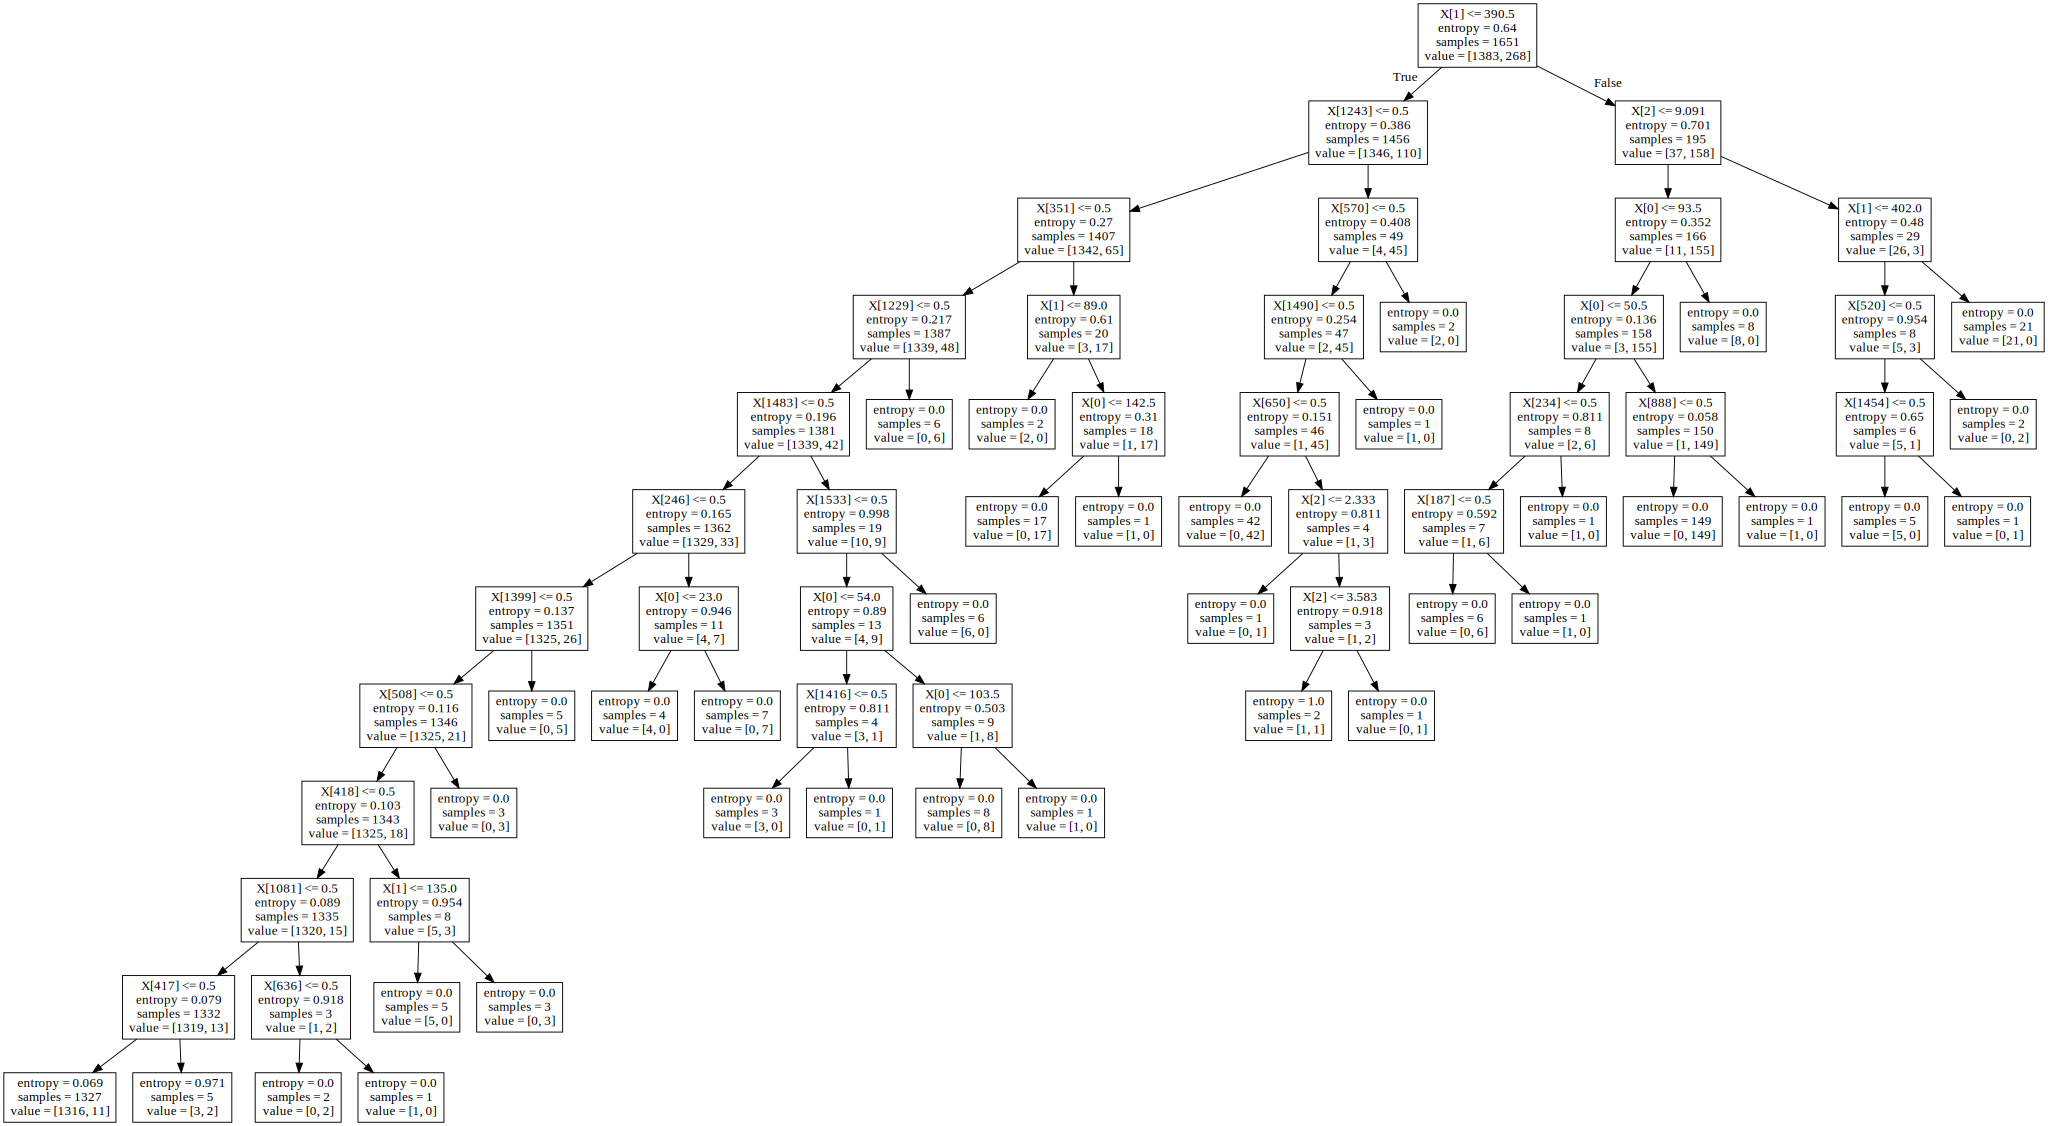

In [10]:
## show the decision tree
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(decision_tree=dt, out_file=None)
graph = graphviz.Source(dot_data)
graph
# graph.render('dt')
# Image(graph.create_png())

In [11]:
y_pred = dt.predict(X_test)

In [12]:
## evaluate the model
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, classification_report, f1_score

c_m = confusion_matrix(y_test, y_pred)
print(c_m)

dc_accuracy = accuracy_score(y_test, y_pred)
dc_precision = precision_score(y_test, y_pred)
dc_recall = recall_score(y_test, y_pred)
dc_f1 = f1_score(y_test, y_pred)
print("decision tree accuracy: %0.2f" %dc_accuracy)
print("decision tree precision: %0.2f" %dc_precision)
print("decision tree recall: %0.2f" %dc_recall)
print("decision tree f1: %0.2f" %dc_f1)

[[587   8]
 [ 18  95]]
decision tree accuracy: 0.96
decision tree precision: 0.92
decision tree recall: 0.84
decision tree f1: 0.88


In [39]:
## prune the tree
import matplotlib.pyplot as plt 
clf = dt

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

In [40]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0003770782852321415, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0014702462060185776, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0016686175058531004, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0016842635076477143, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0019655436086229747, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0019655436086229747, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.002244305357935008, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0025231007949778487, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0030174597518027643, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.003374792080379075, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.003803547341894614, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0040127343244228675, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.004473425481962631, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.004528456358764055, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.004624755919684869, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.004878925701269683, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.00531268554352974, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.006300583495219286, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.006305323922741232, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.006957947344055637, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.011100321315590161, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.01733081440961927, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.017966725956729906, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.02238663058071499, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.03898463644759573, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.040429870304668686, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.09845414289096716, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.21638334659052066, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

Number of nodes in the last tree is: 1 with ccp_alpha: 0.21638334659052066


In [41]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Text(0.5, 0, 'alpha')

Text(0, 0.5, 'number of nodes')

Text(0.5, 1.0, 'Number of nodes vs alpha')

Text(0.5, 0, 'alpha')

Text(0, 0.5, 'depth of tree')

Text(0.5, 1.0, 'Depth vs alpha')

In [42]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

Text(0.5, 0, 'alpha')

Text(0, 0.5, 'accuracy')

Text(0.5, 1.0, 'Accuracy vs alpha for training and testing sets')